<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/time_series_dsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import datetime
import pandas as pd
from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# def parser(x):
#  return datetime.strptime('190'+x, '%Y-%m')
def parser(x):
 return datetime.datetime.strptime('190'+x, '%Y-%m')

# Loading data

[src](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv)

In [ ]:
data_path = "https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/shampoo.csv"

In [ ]:
# series = pd.read_csv(data_path, header=0, parse_dates=[0],
#                      index_col=0, squeeze=True, date_parser=parser)
series = pd.read_csv(data_path, header=0, parse_dates=[0],
                     index_col=0,date_parser=parser)

<ipython-input-5-7d2bcee82d1f>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv(data_path, header=0, parse_dates=[0],


# Plotting the series

<Axes: xlabel='Month'>

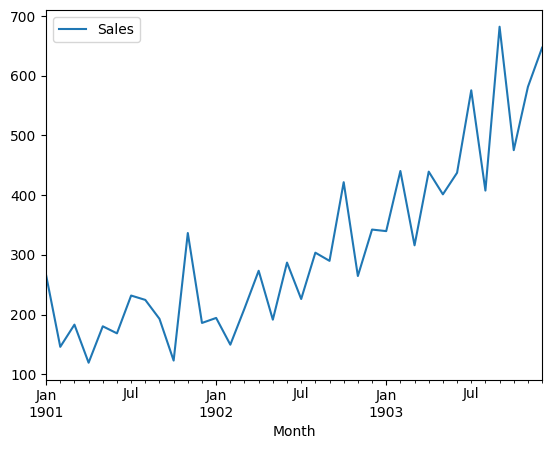

In [ ]:
series.plot()

In [ ]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [ ]:
series.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

# Auto correlations

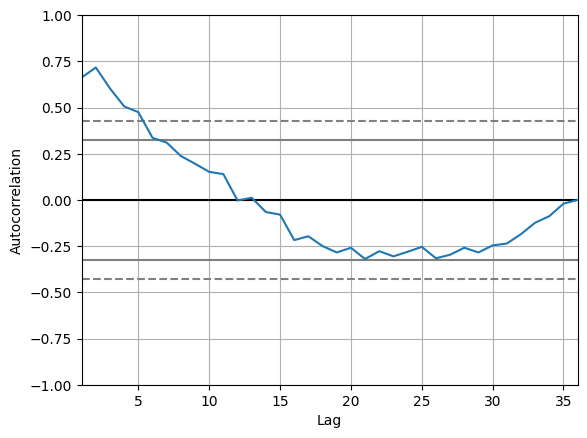

In [ ]:
autocorrelation_plot(series)
pyplot.show()

# ARIMA modeling

- monthly index

We’ll employ the ARIMA(p=5,q=3,d=1) configuration:

5 lags for autoregression (AR)
1st order differencing (I)
No moving average term (MA)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 3, 1)   Log Likelihood                -192.158
Date:                Fri, 15 Nov 2024   AIC                            398.317
Time:                        21:03:01   BIC                            408.792
Sample:                    01-31-1901   HQIC                           401.841
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8933      0.212     -8.948      0.000      -2.308      -1.479
ar.L2         -1.9834      0.394     -5.028      0.000      -2.757      -1.210
ar.L3         -1.6705      0.472     -3.536      0.0

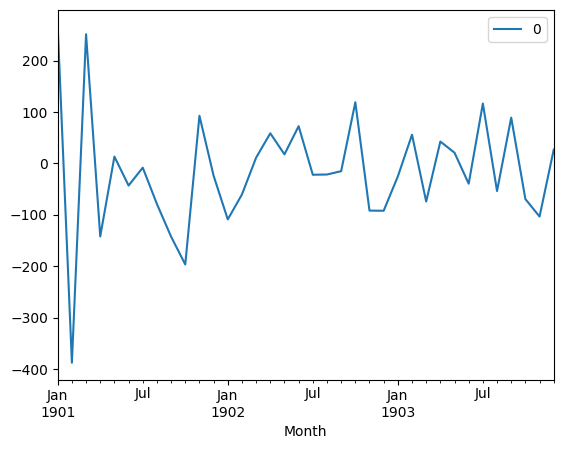

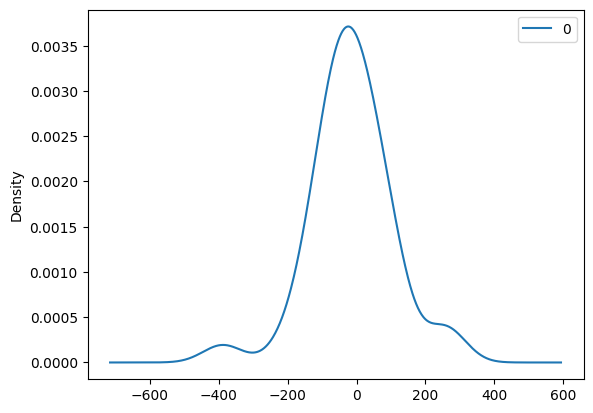

                0
count   36.000000
mean   -15.207085
std    117.522431
min   -387.874863
25%    -75.373042
50%    -21.838491
75%     45.883118
max    266.000000


In [ ]:
# fit an ARIMA model and plot residual errors

series.index = series.index.to_period('M')
# fit model (p=5;q=3;d=1)
model = ARIMA(series, order=(5,3,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
series.index

PeriodIndex(['1901-01', '1901-02', '1901-03', '1901-04', '1901-05', '1901-06',
             '1901-07', '1901-08', '1901-09', '1901-10', '1901-11', '1901-12',
             '1902-01', '1902-02', '1902-03', '1902-04', '1902-05', '1902-06',
             '1902-07', '1902-08', '1902-09', '1902-10', '1902-11', '1902-12',
             '1903-01', '1903-02', '1903-03', '1903-04', '1903-05', '1903-06',
             '1903-07', '1903-08', '1903-09', '1903-10', '1903-11', '1903-12'],
            dtype='period[M]', name='Month')

# Rolling Forecast

- walk-forward validation

<ipython-input-11-7725ca5b483d>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


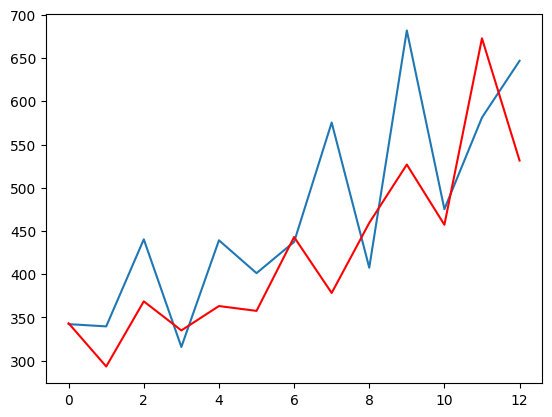

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1, 0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()